In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Environment Ready")


Environment Ready


In [2]:
import pandas as pd

df = pd.read_csv("Plant_1_Generation_Data.csv")

df.head()


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [4]:
df.columns


Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

In [5]:
df["DATE_TIME"] = pd.to_datetime(df["DATE_TIME"])
df["DATE"] = df["DATE_TIME"].dt.date


C:\Users\aman0\AppData\Local\Temp\ipykernel_10092\1979018625.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["DATE_TIME"] = pd.to_datetime(df["DATE_TIME"])


In [6]:
df.isnull().sum()


DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
DATE           0
dtype: int64

In [7]:
df.fillna(method="ffill", inplace=True)


C:\Users\aman0\AppData\Local\Temp\ipykernel_10092\3651561093.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [8]:
df["DATE_TIME"] = pd.to_datetime(df["DATE_TIME"], dayfirst=True)
df["DATE"] = df["DATE_TIME"].dt.date


In [9]:
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15


In [10]:
df["DATE_TIME"] = pd.to_datetime(df["DATE_TIME"], dayfirst=True)
df["DATE"] = df["DATE_TIME"].dt.date


In [11]:
daily_energy = df.groupby("DATE")["AC_POWER"].sum()

daily_energy.head()


DATE
2020-05-15    550830.959402
2020-05-16    568359.821428
2020-05-17    660975.389285
2020-05-18    470969.708929
2020-05-19    532250.491070
Name: AC_POWER, dtype: float64

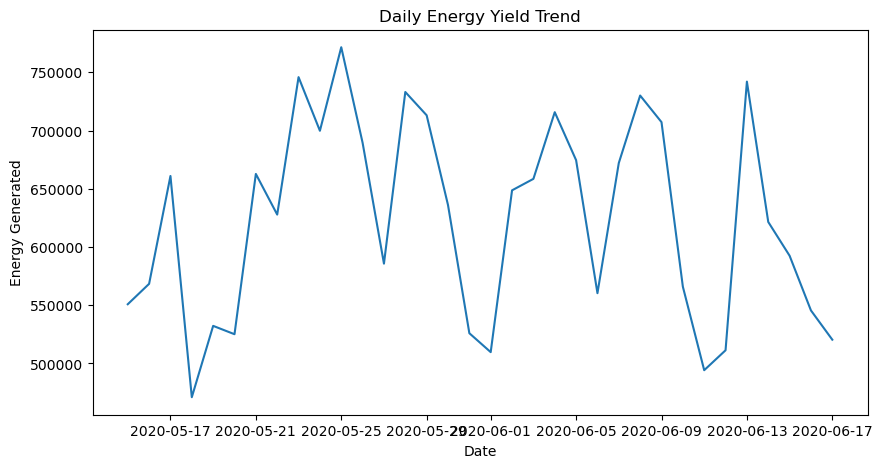

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

daily_energy.plot()

plt.title("Daily Energy Yield Trend")
plt.xlabel("Date")
plt.ylabel("Energy Generated")

plt.show()


In [13]:
plant_capacity = 1000  # Example capacity in kW

cuf = daily_energy / (plant_capacity * 24)

cuf.head()



DATE
2020-05-15    22.951290
2020-05-16    23.681659
2020-05-17    27.540641
2020-05-18    19.623738
2020-05-19    22.177104
Name: AC_POWER, dtype: float64

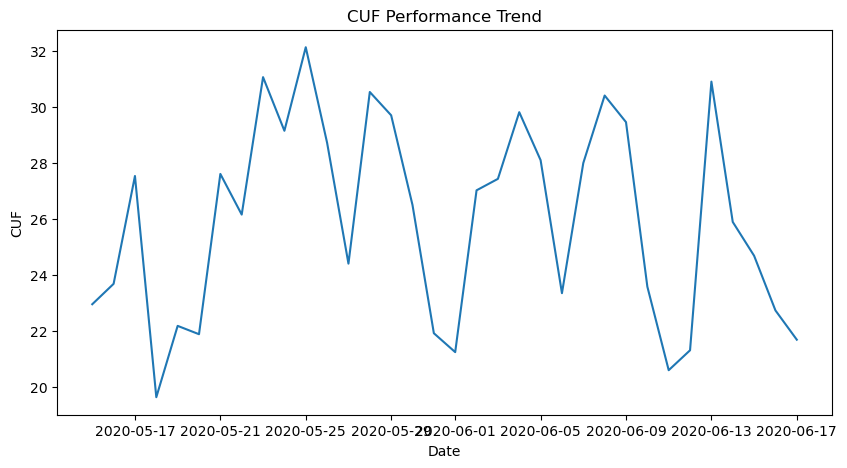

In [14]:
plt.figure(figsize=(10,5))

cuf.plot()

plt.title("CUF Performance Trend")
plt.xlabel("Date")
plt.ylabel("CUF")

plt.show()


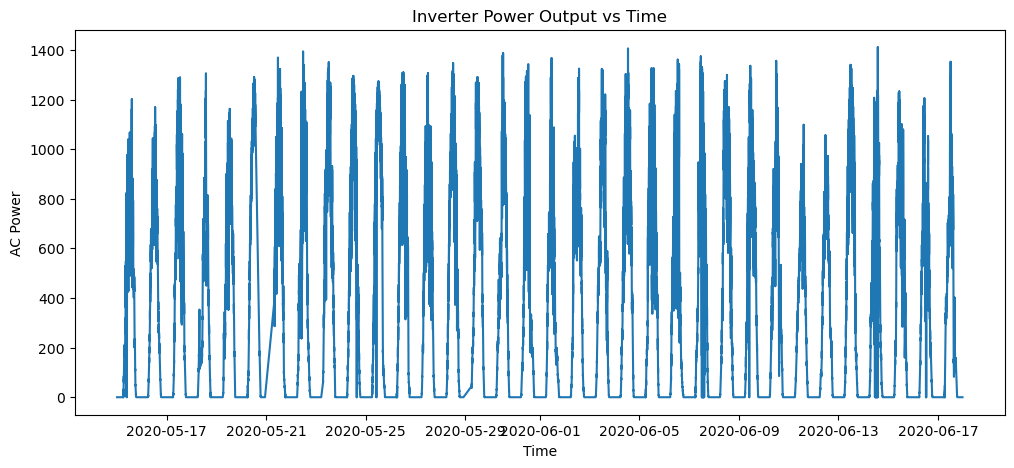

In [15]:
plt.figure(figsize=(12,5))

plt.plot(df["DATE_TIME"], df["AC_POWER"])

plt.title("Inverter Power Output vs Time")
plt.xlabel("Time")
plt.ylabel("AC Power")

plt.show()


In [16]:
df_sorted = df.sort_values("DATE_TIME")

time_diff = df_sorted["DATE_TIME"].diff()

time_diff.describe()


count                        68777
mean     0 days 00:00:42.698867353
std      0 days 00:04:21.993798031
min                0 days 00:00:00
25%                0 days 00:00:00
50%                0 days 00:00:00
75%                0 days 00:00:00
max                0 days 09:00:00
Name: DATE_TIME, dtype: object

In [17]:
expected_gap = pd.Timedelta(minutes=15)

missing_timestamps = df_sorted[time_diff > expected_gap]

missing_timestamps.head()


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE
1965,2020-05-16 02:00:00,4135001,ih0vzX44oOqAx2f,0.000000,0.00,0.000000,6191360.000,2020-05-16
9159,2020-05-19 12:30:00,4135001,ih0vzX44oOqAx2f,10140.000000,991.40,3445.000000,6213932.000,2020-05-19
11302,2020-05-20 17:30:00,4135001,iCRJl6heRkivqQ3,1890.000000,185.30,8816.000000,7219534.000,2020-05-20
11785,2020-05-21 07:45:00,4135001,bvBOhCH3iADSZry,3109.200000,305.54,298.200000,6355336.200,2020-05-21
15644,2020-05-23 06:45:00,4135001,iCRJl6heRkivqQ3,683.166667,66.20,26.166667,7234619.167,2020-05-23


In [18]:
mean_power = df["AC_POWER"].mean()
std_power = df["AC_POWER"].std()

outliers = df[df["AC_POWER"] > mean_power + 3 * std_power]

len(outliers)


0

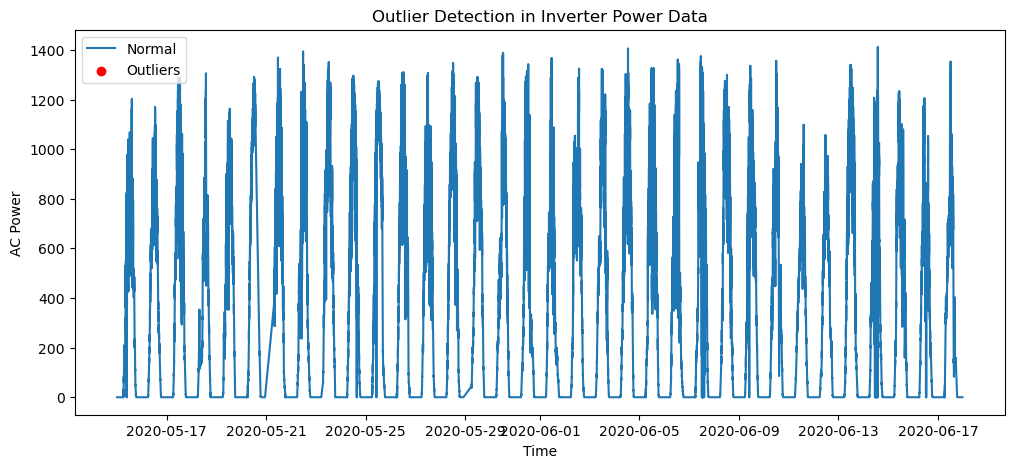

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df["DATE_TIME"], df["AC_POWER"], label="Normal")
plt.scatter(outliers["DATE_TIME"], outliers["AC_POWER"], color="red", label="Outliers")

plt.title("Outlier Detection in Inverter Power Data")
plt.xlabel("Time")
plt.ylabel("AC Power")
plt.legend()
plt.show()


In [20]:
zero_power = df[df["AC_POWER"] == 0]

zero_power.head()


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15


In [21]:
zero_power = df[df["AC_POWER"] == 0]

zero_power.head()


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15


In [22]:
data_quality_report = {
    "Total Records": len(df),
    "Missing Timestamps": len(missing_timestamps),
    "Outliers Detected": len(outliers),
    "Zero Power Records": len(zero_power)
}

data_quality_report


{'Total Records': 68778,
 'Missing Timestamps': 9,
 'Outliers Detected': 0,
 'Zero Power Records': 31951}

In [23]:
df.to_csv("cleaned_scada_data.csv", index=False)
daily_energy.to_csv("daily_energy_report.csv")
